<h2> 1. Import libraries </h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import yfinance as yf

from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

from Data_Retriever import DataRetriever as DatRet
from Markowitz_PT import MarkowitzPT as MPT
from BHB_Analyzer import BHBAnalyzer as BHBA

<h2> 2. Define experimental variables </h2>

In [2]:
# Define number of trades
trading_n = 10

In [3]:
# Defining stock pool
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["EQNR.OL", "AKRBP.OL", "SUBC.OL", "BWO.OL",]
# ticker_df["Seafood (food)"] = ["ORK.OL", "MOWI.OL", "SALM.OL", "LSG.OL"]
# ticker_df["Materials"] = ["NHY.OL", "YAR.OL", "RECSI.OL", "BRG.OL"]
# ticker_df["Technologies"] = ["TEL.OL", "NOD.OL", "ATEA.OL", "BOUV.OL"]
# ticker_df["Financial"] = ["STB.OL", "DNB.OL", "GJF.OL", "MING.OL"]
# ticker_df["Shipping"] = ["WAWI.OL", "SNI.OL", "BELCO.OL", "ODF.OL"]

<h2> 3. Retrieve data </h2>

In [4]:
# Retrieve data from yf API: y-m-d
data = DatRet(ticker_df, "2012-10-01", "2025-02-18")

# In function below, set log=True to check for data availability
data.retrieve_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


'--Data retrieved successfully--'

<h2> 4. Frequency trading using MPT </h2>

In [5]:
# Generate benchmark weights thorugh MPT using Sharpe ratio
benchmark = MPT(data.returns, 252,trading_n)
benchmark.frequency_optimizing()

--Frequency trading using MPT successfully performed--


<h2> 5. Conduct performance analysis </h2>

In [6]:
# Performance analysis thorugh BHB
result_analysis = BHBA(benchmark.frequency_weights, 0, data.returns, 10)
result_analysis.frequency_analyze()

In [ ]:
# General things to calcualte for all sectors at time  t
r_exp = (0.2*0.03)+(0.8*0.02)
r_ben = (0.4*0.025)+(0.6*0.023) 
r_wave = (0.2*0.025) + (0.8*0.023)
k = (np.log(1+r_exp) - np.log(1+r_ben))/(r_exp-r_ben)

# Geometric allocation and selection effect for portfolio at time t
sel = np.e**(k*(r_exp-r_wave))
all = np.e**(k*(r_wave-r_ben))

In [134]:
all*sel*(1.0238)

np.float64(1.022)

In [131]:
exp = (0.2*0.03)+(0.8*0.02)
ben = (0.4*0.025)+(0.6*0.023)
print(exp, " ", ben, "", (exp-ben)/ben)

0.022   0.0238  -0.07563025210084046


<h2> 6. Ad-hoc result analysis [DRAFT] </h2>

In [7]:
hotel = result_analysis.arit_excess_return
op = [hotel[i][3] for i in range(len(hotel))]
ae = [hotel[i][0] for i in range(len(hotel))]
se = [hotel[i][1] for i in range(len(hotel))]
ie = [hotel[i][2] for i in range(len(hotel))]

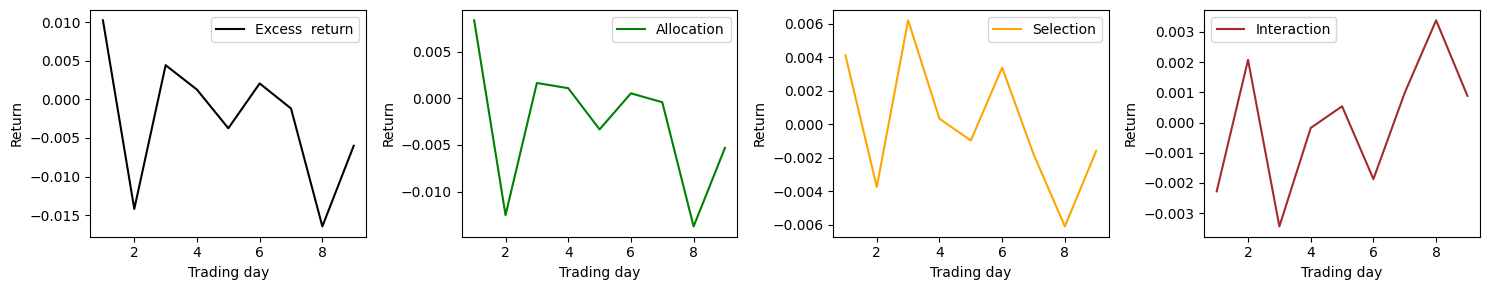

In [8]:
fig, ax = plt.subplots(1,4, figsize=(15,3))
data_arrays = [op, ae, se, ie]
data_labels = ["Excess  return", "Allocation", "Selection", "Interaction"]
colors = ["black", "green", "orange", "brown"]
for i in range(4):
    ax[i].plot(np.linspace(1,9,9),data_arrays[i], color =colors[i], label=data_labels[i])
    ax[i].set_xlabel("Trading day")
    ax[i].set_ylabel("Return")
    ax[i].legend()

fig.tight_layout()

C:\Users\Jakob\AppData\Local\Temp\ipykernel_6860\633921674.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_arrays, labels=data_labels)


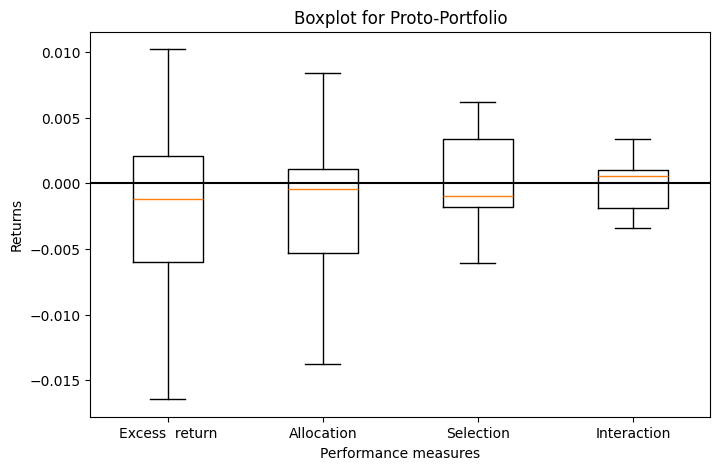

In [9]:
plt.figure(figsize=(8, 5))
plt.boxplot(data_arrays, labels=data_labels)

# Titles and labels
plt.title("Boxplot for Proto-Portfolio")
plt.xlabel("Performance measures")
plt.ylabel("Returns")
plt.axhline(y=0, color="black" )
# Show the plot
plt.show()

The boxplot values should be transformed into z-values for better comparisment.